In [4]:
import torch

In [5]:
inputs = torch.tensor([
    [0.43, 0.15, 0.89], # Your      (x^1)
    [0.55, 0.87, 0.66], # journey   (x^2)
    [0.57, 0.85, 0.64], # starts    (x^3)
    [0.22, 0.58, 0.33], # with      (x^4)
    [0.77, 0.25, 0.10], # one       (x^5)
    [0.05, 0.80, 0.55]  # step      (x^6)
])

<div align="center">
  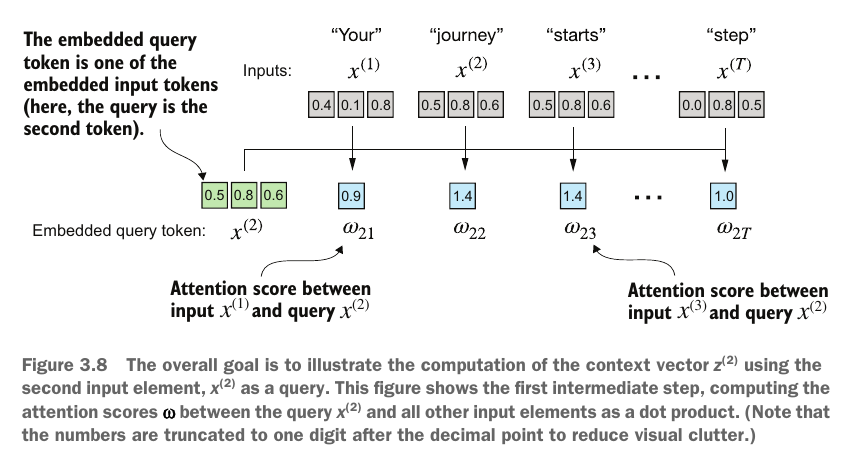
</div>

In [7]:
query = inputs[1]

attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)

In [8]:
print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


A dot product is essentially a concise way of multiplying two vectors element-wise and
then summing the products.

A higher dot product indicates a greater degree of alignment or similarity between the vectors.

In the context of self-attention mechanisms, the dot product determines the extent to which
each element in a sequence focuses on, or “attends to,” any other element.

The higher the dot product, the higher the similarity and attention score between two
elements.

In [20]:
# Simple Normalization:

attn_weights_2_norm = attn_scores_2 / attn_scores_2.sum()

In [21]:
# Normalization With Softmax Function:

def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0)

attn_weights_2_naive = softmax_naive(attn_scores_2)

In [22]:
# Normalization With PyTorch Softmax Function:

attn_weights_2_torch = torch.softmax(attn_scores_2, dim=0)

In [24]:
print("Weights after Simple Norm =>", attn_weights_2_norm)
print("Weights after Softmax Naive =>", attn_weights_2_naive)
print("Weights after PyTorch Softmax =>", attn_weights_2_torch, end="\n\n")

print("Sum of Simple Norm Weights =>", attn_weights_2_norm.sum())
print("Sum of Simple Softmax Naive =>", attn_weights_2_naive.sum())
print("Sum of Simple PyTorch Softmax =>", attn_weights_2_torch.sum())

Weights after Simple Norm => tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Weights after Softmax Naive => tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Weights after PyTorch Softmax => tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])

Sum of Simple Norm Weights => tensor(1.0000)
Sum of Simple Softmax Naive => tensor(1.)
Sum of Simple PyTorch Softmax => tensor(1.)


<div align="center">
  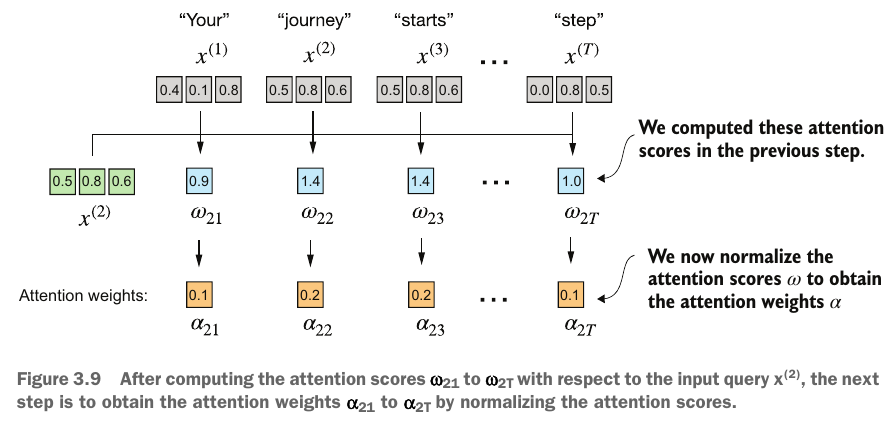
</div>

In [30]:
context_vec_2 = torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2_torch[i]*x_i

In [32]:
print("Context Vector for Input 02 =>", context_vec_2)

Context Vector for Input 02 => tensor([0.4419, 0.6515, 0.5683])


<div align="center">
  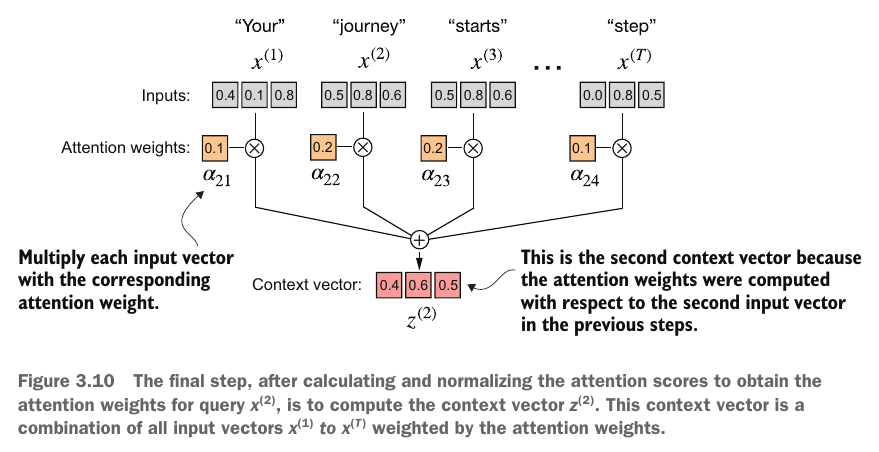
</div>

In [39]:
# Calculating Attention Scores with Loops:

attn_scores = torch.empty(6, 6)
for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)

In [40]:
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [41]:
# Calculating Attention Scores with Matrix Multiplication:

attn_scores = inputs @ inputs.T

In [38]:
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [42]:
attn_weights = torch.softmax(attn_scores, dim=-1)

In [47]:
print(attn_weights, end="\n\n")
print("Sum of All Rows:", attn_weights.sum(dim=-1))

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])

Sum of All Rows: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


<div align="center">
  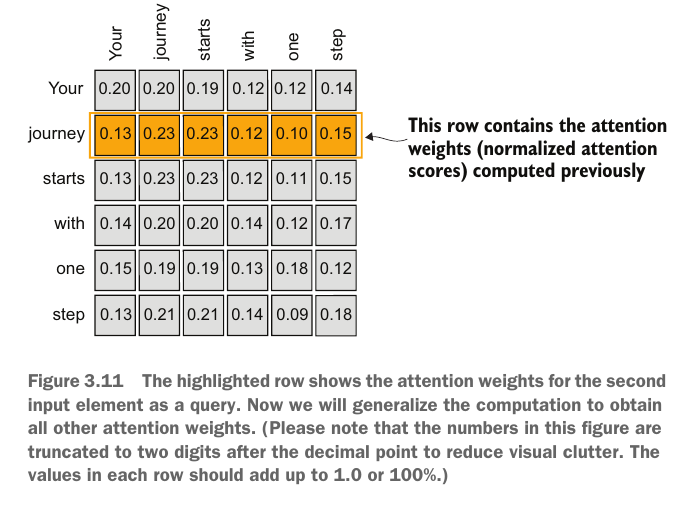
</div>

<div align="center">
  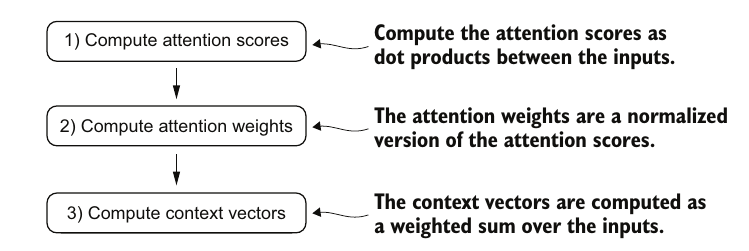
</div>

In [48]:
context_vecs = attn_weights @ inputs

In [49]:
print(context_vecs)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])
